<a href="https://colab.research.google.com/github/Afealete/Personal_fraud_detector/blob/main/fraud_detector.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#Install required libraries
!pip install shap streamlit scikit-learn pandas matplotlib seaborn -q

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.3/44.3 kB 1.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.1/10.1 MB 67.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.9/6.9 MB 107.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.1/79.1 kB 5.4 MB/s eta 0:00:00


In [2]:
#Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.metrics import f1_score, precision_score, recall_score
from sklearn.ensemble import IsolationForest, RandomForestClassifier
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import classification_report, roc_auc_score
from sklearn.preprocessing import StandardScaler
import shap
import joblib


In [3]:
#Load dataset
fraud_df = pd.read_csv('Bank_Transaction_Fraud_Detection.csv')
fraud_df

,Customer_ID,Customer_Name,Gender,Age,State,City,Bank_Branch,Account_Type,Transaction_ID,Transaction_Date,...,Merchant_Category,Account_Balance,Transaction_Device,Transaction_Location,Device_Type,Is_Fraud,Transaction_Currency,Customer_Contact,Transaction_Description,Customer_Email
0,d5f6ec07-d69e-4f47-b9b4-7c58ff17c19e,Osha Tella,Male,60,Kerala,Thiruvananthapuram,Thiruvananthapuram Branch,Savings,4fa3208f-9e23-42dc-b330-844829d0c12c,23-01-2025,...,Restaurant,74557.27,Voice Assistant,"Thiruvananthapuram, Kerala",POS,0.0,INR,+9198579XXXXXX,Bitcoin transaction,oshaXXXXX@XXXXX.com
1,7c14ad51-781a-4db9-b7bd-67439c175262,Hredhaan Khosla,Female,51,Maharashtra,Nashik,Nashik Branch,Business,c9de0c06-2c4c-40a9-97ed-3c7b8f97c79c,11-01-2025,...,Restaurant,74622.66,POS Mobile Device,"Nashik, Maharashtra",Desktop,0.0,INR,+9191074XXXXXX,Grocery delivery,hredhaanXXXX@XXXXXX.com
2,3a73a0e5-d4da-45aa-85f3-528413900a35,Ekani Nazareth,Male,20,Bihar,Bhagalpur,Bhagalpur Branch,Savings,e41c55f9-c016-4ff3-872b-cae72467c75c,25-01-2025,...,Groceries,66817.99,ATM,"Bhagalpur, Bihar",Desktop,0.0,INR,+9197745XXXXXX,Mutual fund investment,ekaniXXX@XXXXXX.com
3,7902f4ef-9050-4a79-857d-9c2ea3181940,Yamini Ramachandran,Female,57,Tamil Nadu,Chennai,Chennai Branch,Business,7f7ee11b-ff2c-45a3-802a-49bc47c02ecb,19-01-2025,...,Entertainment,58177.08,POS Mobile App,"Chennai, Tamil Nadu",Mobile,0.0,INR,+9195889XXXXXX,Food delivery,yaminiXXXXX@XXXXXXX.com
4,3a4bba70-d9a9-4c5f-8b92-1735fd8c19e9,Kritika Rege,Female,43,Punjab,Amritsar,Amritsar Branch,Savings,f8e6ac6f-81a1-4985-bf12-f60967d852ef,30-01-2025,...,Entertainment,16108.56,Virtual Card,"Amritsar, Punjab",Mobile,0.0,INR,+9195316XXXXXX,Debt repayment,kritikaXXXX@XXXXXX.com
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30699,63f9cedf-dd7a-46ef-81a8-2e0ad985942f,Vyanjana Thakur,Female,66,Manipur,Imphal,Imphal Branch,Business,7c6497b1-783f-4138-935c-03c7d841bc63,20-01-2025,...,Clothing,37522.75,Debit/Credit Card,"Imphal, Manipur",ATM,0.0,INR,+9199298XXXXXX,Grocery shopping,vyanjanaXXX@XXXXXXX.com
30700,1125719f-4720-418e-a2c9-9218c9839242,Naksh Sachdeva,Female,37,Punjab,Jalandhar,Jalandhar Branch,Business,35ba8d49-bf06-43b8-a6f7-f104e3bdc646,23-01-2025,...,Restaurant,67751.76,Banking Chatbot,"Jalandhar, Punjab",Mobile,0.0,INR,+9193189XXXXXX,Clinic payment,nakshXXXXX@XXXXXXX.com
30701,0cb6623f-d584-4048-81ec-3b20ae35387e,Baghyawati Datta,Female,68,Himachal Pradesh,Kullu,Kullu Branch,Checking,7595f310-ec36-4419-bc63-22b449efd4ac,19-01-2025,...,Health,98842.30,ATM,"Kullu, Himachal Pradesh",Desktop,0.0,INR,+9199384XXXXXX,Long-distance transport,baghyawatiXXXXX@XXXXXX.com
30702,31b0b5fa-83b1-4ee8-ada4-da067db19564,Divya Kala,Female,31,Lakshadweep,Kavaratti,Kavaratti Branch,Savings,e45f5ff7-5c0c-419e-b585-344b24e31536,20-01-2025,...,Health,42240.69,ATM,"Kavaratti, Lakshadweep",ATM,0.0,INR,+9197284XXXXXX,Contract renewal,divyaXXXXX@XXXXXXX.com


(30704, 24)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30704 entries, 0 to 30703
Data columns (total 24 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Customer_ID              30704 non-null  object 
 1   Customer_Name            30704 non-null  object 
 2   Gender                   30704 non-null  object 
 3   Age                      30704 non-null  int64  
 4   State                    30704 non-null  object 
 5   City                     30704 non-null  object 
 6   Bank_Branch              30704 non-null  object 
 7   Account_Type             30704 non-null  object 
 8   Transaction_ID           30704 non-null  object 
 9   Transaction_Date         30704 non-null  object 
 10  Transaction_Time         30704 non-null  object 
 11  Transaction_Amount       30704 non-null  float64
 12  Merchant_ID              30703 non-null  object 
 13  Transaction_Type         30703 non-null  object 
 14  Merchant_C

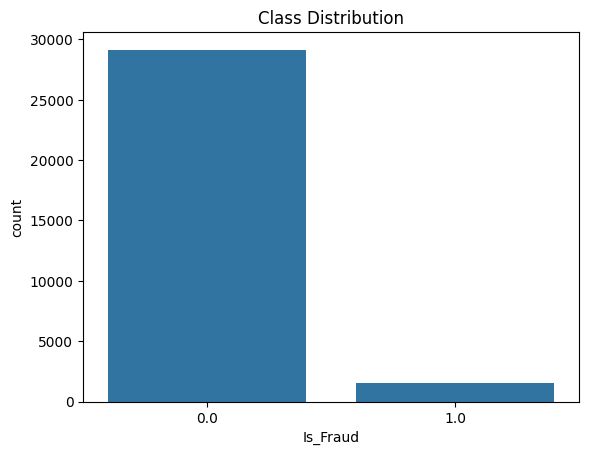

In [4]:
#Exploration of dataset
print(fraud_df.shape)
print(fraud_df.info())
print(fraud_df['Is_Fraud'].value_counts(normalize=True))

# Visualize class imbalance
sns.countplot(x='Is_Fraud', data=fraud_df)
plt.title("Class Distribution")
plt.show()


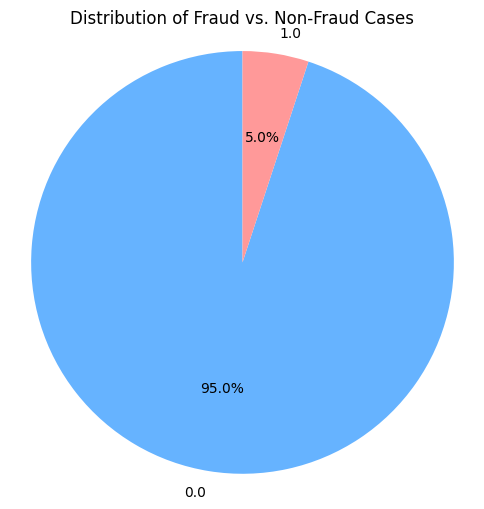

In [5]:
# Get class distribution proportions
fraud_class_distribution = fraud_df['Is_Fraud'].value_counts(normalize=True)

# Pie chart of fraud vs. non-fraud
plt.figure(figsize=(6, 6))
plt.pie(fraud_class_distribution, labels=fraud_class_distribution.index, autopct='%1.1f%%', startangle=90, colors=['#66b3ff', '#ff9999'])
plt.title('Distribution of Fraud vs. Non-Fraud Cases')
plt.axis('equal')  # Equal aspect ratio ensures the pie is a circle
plt.show()


In [7]:
#Handling Missing Values
fraud_df.isnull().sum()

,0
Customer_ID,0
Customer_Name,0
Gender,0
Age,0
State,0
City,0
Bank_Branch,0
Account_Type,0
Transaction_ID,0
Transaction_Date,0


In [9]:
#Hnadling missing values
fraud_df = fraud_df.dropna()  # drops rows with any null value
fraud_df.isnull().sum()

,0
Customer_ID,0
Customer_Name,0
Gender,0
Age,0
State,0
City,0
Bank_Branch,0
Account_Type,0
Transaction_ID,0
Transaction_Date,0


In [10]:
#Checking for duplicates
fraud_df.duplicated().sum()

np.int64(0)

In [11]:
#getting  categorical features
fraud_df.select_dtypes(include=['object']).columns

Index(['Customer_ID', 'Customer_Name', 'Gender', 'State', 'City',
       'Bank_Branch', 'Account_Type', 'Transaction_ID', 'Transaction_Date',
       'Transaction_Time', 'Merchant_ID', 'Transaction_Type',
       'Merchant_Category', 'Transaction_Device', 'Transaction_Location',
       'Device_Type', 'Transaction_Currency', 'Customer_Contact',
       'Transaction_Description', 'Customer_Email'],
      dtype='object')

In [12]:
#Dropping unwanted features
fraud_df.drop(columns=['Customer_ID', 'Customer_Name', 'Transaction_ID', 'Customer_Contact','Customer_Email'], inplace=True)
fraud_df

,Gender,Age,State,City,Bank_Branch,Account_Type,Transaction_Date,Transaction_Time,Transaction_Amount,Merchant_ID,Transaction_Type,Merchant_Category,Account_Balance,Transaction_Device,Transaction_Location,Device_Type,Is_Fraud,Transaction_Currency,Transaction_Description
0,Male,60,Kerala,Thiruvananthapuram,Thiruvananthapuram Branch,Savings,23-01-2025,16:04:07,32415.45,214e03c5-5c34-40d1-a66c-f440aa2bbd02,Transfer,Restaurant,74557.27,Voice Assistant,"Thiruvananthapuram, Kerala",POS,0.0,INR,Bitcoin transaction
1,Female,51,Maharashtra,Nashik,Nashik Branch,Business,11-01-2025,17:14:53,43622.60,f9e3f11f-28d3-4199-b0ca-f225a155ede6,Bill Payment,Restaurant,74622.66,POS Mobile Device,"Nashik, Maharashtra",Desktop,0.0,INR,Grocery delivery
2,Male,20,Bihar,Bhagalpur,Bhagalpur Branch,Savings,25-01-2025,03:09:52,63062.56,97977d83-5486-4510-af1c-8dada3e1cfa0,Bill Payment,Groceries,66817.99,ATM,"Bhagalpur, Bihar",Desktop,0.0,INR,Mutual fund investment
3,Female,57,Tamil Nadu,Chennai,Chennai Branch,Business,19-01-2025,12:27:02,14000.72,f45cd6b3-5092-44d0-8afb-490894605184,Debit,Entertainment,58177.08,POS Mobile App,"Chennai, Tamil Nadu",Mobile,0.0,INR,Food delivery
4,Female,43,Punjab,Amritsar,Amritsar Branch,Savings,30-01-2025,18:30:46,18335.16,70dd77dd-3b00-4b2c-8ebc-cfb8af5f6741,Transfer,Entertainment,16108.56,Virtual Card,"Amritsar, Punjab",Mobile,0.0,INR,Debt repayment
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30698,Female,65,Andaman and Nicobar Islands,Car Nicobar,Car Nicobar Branch,Checking,11-01-2025,18:06:06,593.39,c164c12b-f698-4ed9-a259-31279e8e065f,Credit,Health,59930.29,Self-service Banking Machine,"Car Nicobar, Andaman and Nicobar Islands",Desktop,0.0,INR,Department store shopping
30699,Female,66,Manipur,Imphal,Imphal Branch,Business,20-01-2025,12:16:41,90862.48,c426d5b0-dd6b-4dbe-af49-129f714cb7c0,Transfer,Clothing,37522.75,Debit/Credit Card,"Imphal, Manipur",ATM,0.0,INR,Grocery shopping
30700,Female,37,Punjab,Jalandhar,Jalandhar Branch,Business,23-01-2025,10:43:45,24368.70,09d73694-af89-4446-9808-151ff59cdf64,Bill Payment,Restaurant,67751.76,Banking Chatbot,"Jalandhar, Punjab",Mobile,0.0,INR,Clinic payment
30701,Female,68,Himachal Pradesh,Kullu,Kullu Branch,Checking,19-01-2025,02:55:23,40890.28,4644cb16-28a2-4b5a-9803-cadec0843061,Withdrawal,Health,98842.30,ATM,"Kullu, Himachal Pradesh",Desktop,0.0,INR,Long-distance transport


In [13]:
# Target separation
X = fraud_df.drop(columns=['Is_Fraud'])
y = fraud_df['Is_Fraud']
X


,Gender,Age,State,City,Bank_Branch,Account_Type,Transaction_Date,Transaction_Time,Transaction_Amount,Merchant_ID,Transaction_Type,Merchant_Category,Account_Balance,Transaction_Device,Transaction_Location,Device_Type,Transaction_Currency,Transaction_Description
0,Male,60,Kerala,Thiruvananthapuram,Thiruvananthapuram Branch,Savings,23-01-2025,16:04:07,32415.45,214e03c5-5c34-40d1-a66c-f440aa2bbd02,Transfer,Restaurant,74557.27,Voice Assistant,"Thiruvananthapuram, Kerala",POS,INR,Bitcoin transaction
1,Female,51,Maharashtra,Nashik,Nashik Branch,Business,11-01-2025,17:14:53,43622.60,f9e3f11f-28d3-4199-b0ca-f225a155ede6,Bill Payment,Restaurant,74622.66,POS Mobile Device,"Nashik, Maharashtra",Desktop,INR,Grocery delivery
2,Male,20,Bihar,Bhagalpur,Bhagalpur Branch,Savings,25-01-2025,03:09:52,63062.56,97977d83-5486-4510-af1c-8dada3e1cfa0,Bill Payment,Groceries,66817.99,ATM,"Bhagalpur, Bihar",Desktop,INR,Mutual fund investment
3,Female,57,Tamil Nadu,Chennai,Chennai Branch,Business,19-01-2025,12:27:02,14000.72,f45cd6b3-5092-44d0-8afb-490894605184,Debit,Entertainment,58177.08,POS Mobile App,"Chennai, Tamil Nadu",Mobile,INR,Food delivery
4,Female,43,Punjab,Amritsar,Amritsar Branch,Savings,30-01-2025,18:30:46,18335.16,70dd77dd-3b00-4b2c-8ebc-cfb8af5f6741,Transfer,Entertainment,16108.56,Virtual Card,"Amritsar, Punjab",Mobile,INR,Debt repayment
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30698,Female,65,Andaman and Nicobar Islands,Car Nicobar,Car Nicobar Branch,Checking,11-01-2025,18:06:06,593.39,c164c12b-f698-4ed9-a259-31279e8e065f,Credit,Health,59930.29,Self-service Banking Machine,"Car Nicobar, Andaman and Nicobar Islands",Desktop,INR,Department store shopping
30699,Female,66,Manipur,Imphal,Imphal Branch,Business,20-01-2025,12:16:41,90862.48,c426d5b0-dd6b-4dbe-af49-129f714cb7c0,Transfer,Clothing,37522.75,Debit/Credit Card,"Imphal, Manipur",ATM,INR,Grocery shopping
30700,Female,37,Punjab,Jalandhar,Jalandhar Branch,Business,23-01-2025,10:43:45,24368.70,09d73694-af89-4446-9808-151ff59cdf64,Bill Payment,Restaurant,67751.76,Banking Chatbot,"Jalandhar, Punjab",Mobile,INR,Clinic payment
30701,Female,68,Himachal Pradesh,Kullu,Kullu Branch,Checking,19-01-2025,02:55:23,40890.28,4644cb16-28a2-4b5a-9803-cadec0843061,Withdrawal,Health,98842.30,ATM,"Kullu, Himachal Pradesh",Desktop,INR,Long-distance transport


In [14]:
# Encode categorical features
#Label encoding
for col in X.select_dtypes(include='object'):
    X[col] = X[col].astype('category').cat.codes

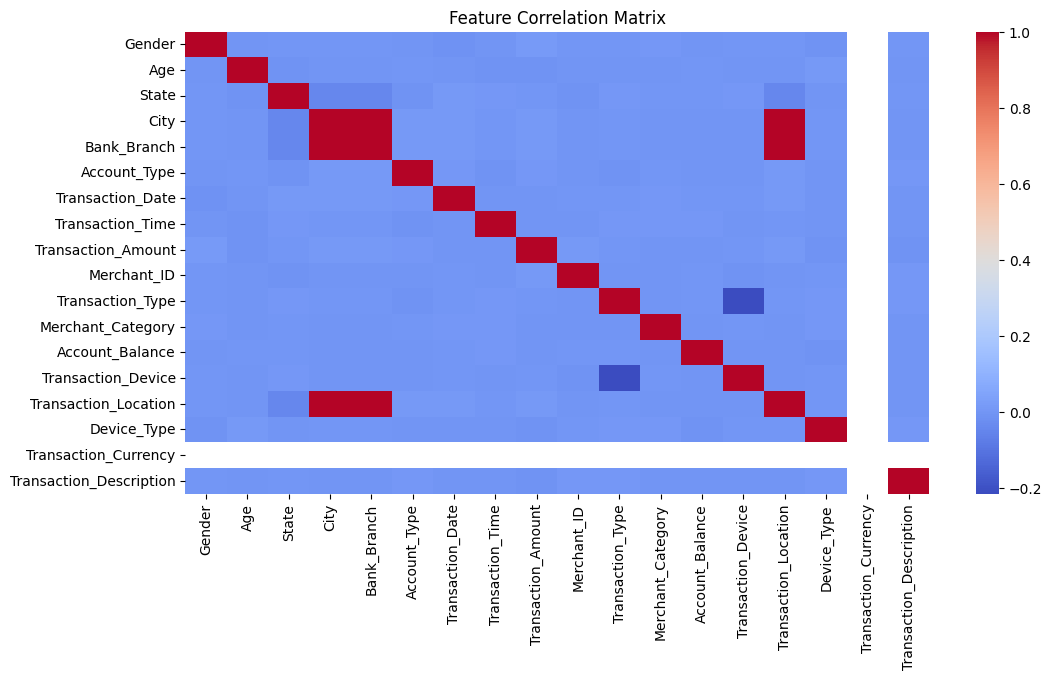

In [15]:
# Correlation matrix
plt.figure(figsize=(12, 6))
sns.heatmap(X.corr(), cmap='coolwarm')
plt.title('Feature Correlation Matrix')
plt.show()

In [16]:
#Normalization
scaler = StandardScaler()
X_scaled = pd.DataFrame(scaler.fit_transform(X), columns=X.columns)


In [21]:
import time

# ⏱️ For benchmarking runtime
start = time.time()

# Parameter grid
param_grid = {
    'n_estimators': [50],  # Reduced to 1 value for speed (tweak later for robustness)
    'max_samples': ['auto'],
    'contamination': [0.01, 0.02, 0.05, 0.1]
}

# Initialize tracking variables
best_model = None
best_f1 = 0
results = []

# Loop through parameter combinations
for n in param_grid['n_estimators']:
    for s in param_grid['max_samples']:
        for c in param_grid['contamination']:
            iso = IsolationForest(
                n_estimators=n,
                max_samples=s,
                contamination=c,
                n_jobs=-1,
                random_state=42
            )
            preds = iso.fit_predict(X_scaled)
            preds = np.where(preds == -1, 1, 0)

            #Compare the model’s anomaly predictions (preds) against real fraud labels (y)
            f1 = f1_score(y, preds)
            precision = precision_score(y, preds)
            recall = recall_score(y, preds)

            results.append({
                'n_estimators': n,
                'max_samples': s,
                'contamination': c,
                'F1': f1,
                'Precision': precision,
                'Recall': recall
            })

            if f1 > best_f1:
                best_f1 = f1
                best_model = iso
                best_preds = preds

print(f"✅ Search completed in {round(time.time() - start, 2)} seconds")

# ⏹️ Results DataFrame
results_df = pd.DataFrame(results)
results_df = results_df.sort_values(by='F1', ascending=False)
print(results_df)

# Final predictions
anomaly_score = best_preds




✅ Search completed in 3.85 seconds
   n_estimators max_samples  contamination        F1  Precision    Recall
3            50        auto           0.10  0.077040   0.057962  0.114839
2            50        auto           0.05  0.061568   0.061849  0.061290
1            50        auto           0.02  0.037875   0.066667  0.026452
0            50        auto           0.01  0.024758   0.074675  0.014839


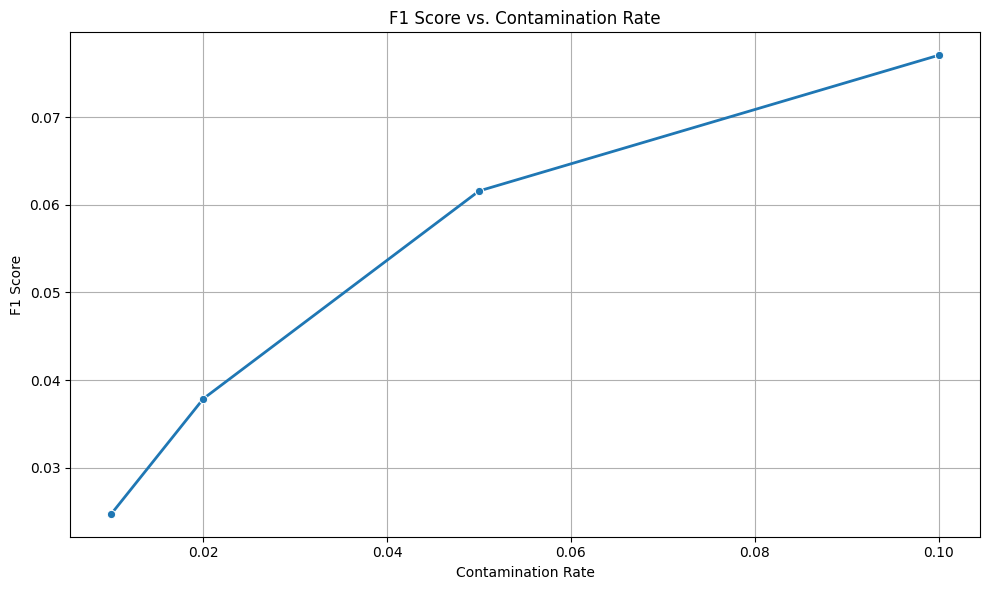

In [22]:
# Convert 'contamination' column to numeric (in case it's object type)
results_df['contamination'] = results_df['contamination'].astype(float)

# Plot
plt.figure(figsize=(10, 6))
sns.lineplot(data=results_df, x='contamination', y='F1', marker='o', linewidth=2)

plt.title('F1 Score vs. Contamination Rate')
plt.xlabel('Contamination Rate')
plt.ylabel('F1 Score')
plt.grid(True)
plt.tight_layout()
plt.show()


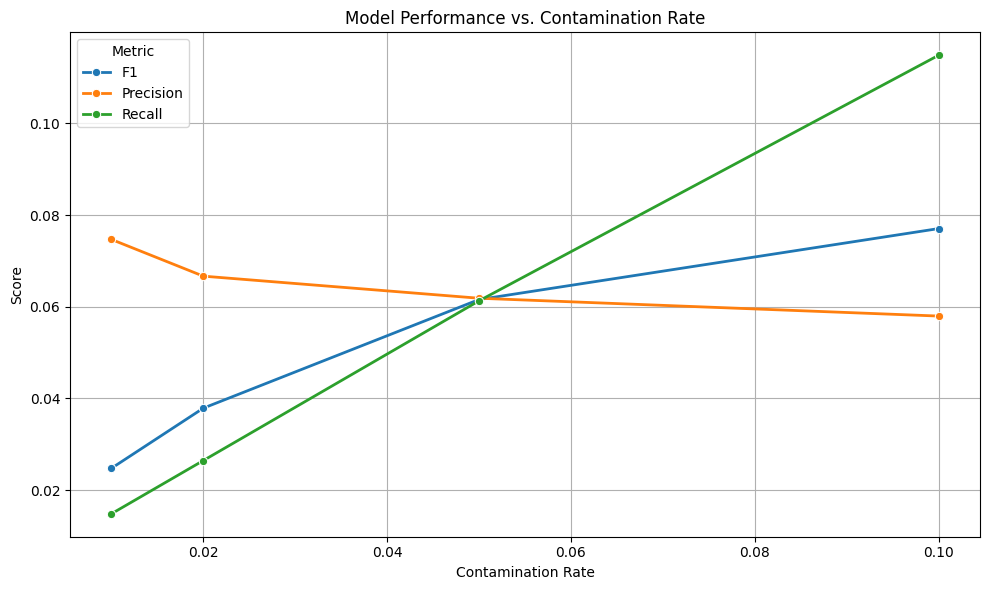

In [23]:
# Melt the DataFrame for seaborn multi-line plotting
melted = results_df.melt(id_vars='contamination', value_vars=['F1', 'Precision', 'Recall'],
                         var_name='Metric', value_name='Score')

# Plot
plt.figure(figsize=(10, 6))
sns.lineplot(data=melted, x='contamination', y='Score', hue='Metric', marker='o', linewidth=2)

plt.title('Model Performance vs. Contamination Rate')
plt.xlabel('Contamination Rate')
plt.ylabel('Score')
plt.grid(True)
plt.legend(title='Metric')
plt.tight_layout()
plt.show()


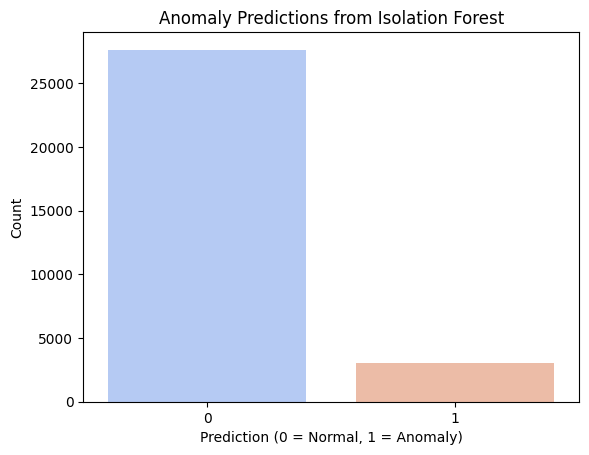

   Label  Proportion
0      0    0.899977
1      1    0.100023


In [24]:
# Create a DataFrame if anomaly_score is still a NumPy array
anomaly_df = pd.DataFrame({'anomaly_score': anomaly_score})

# Visualize anomaly class counts
sns.countplot(data=anomaly_df, x='anomaly_score', hue='anomaly_score', palette='coolwarm', legend=False)
plt.title("Anomaly Predictions from Isolation Forest")
plt.xlabel("Prediction (0 = Normal, 1 = Anomaly)")
plt.ylabel("Count")
plt.show()
print(anomaly_df['anomaly_score'].value_counts(normalize=True).rename_axis('Label').reset_index(name='Proportion'))

In [25]:
# Fit KMeans (2 clusters: 0 = normal, 1 = fraud)
kmeans = KMeans(n_clusters=2, random_state=42)
kmeans_labels = kmeans.fit_predict(X_scaled)

# Use distance from centroid to flag top 1% as anomaly
centroids = kmeans.cluster_centers_
assigned = centroids[kmeans_labels]
distances = np.linalg.norm(X_scaled - assigned, axis=1)

# Flag top 1% farthest points as anomalies
threshold = np.percentile(distances, 99)
kmeans_anomaly = (distances >= threshold).astype(int)

# Evaluate against actual labels
f1_k = f1_score(y, kmeans_anomaly)
precision_k = precision_score(y, kmeans_anomaly)
recall_k = recall_score(y, kmeans_anomaly)

# ----- Combine with Isolation Forest Results -----
isolation_forest_summary = results_df.sort_values(by='F1', ascending=False).head(1).copy()
isolation_forest_summary['Model'] = 'Isolation Forest'
isolation_forest_summary = isolation_forest_summary[['Model', 'F1', 'Precision', 'Recall']]

kmeans_results = pd.DataFrame([{
    'Model': 'KMeans',
    'F1': f1_k,
    'Precision': precision_k,
    'Recall': recall_k
}])

comparison_df = pd.concat([isolation_forest_summary, kmeans_results], ignore_index=True)
print("🔍 Unsupervised Model Comparison:")
print(comparison_df.sort_values(by='F1', ascending=False))

🔍 Unsupervised Model Comparison:
              Model        F1  Precision    Recall
0  Isolation Forest  0.077040   0.057962  0.114839
1            KMeans  0.031216   0.094156  0.018710


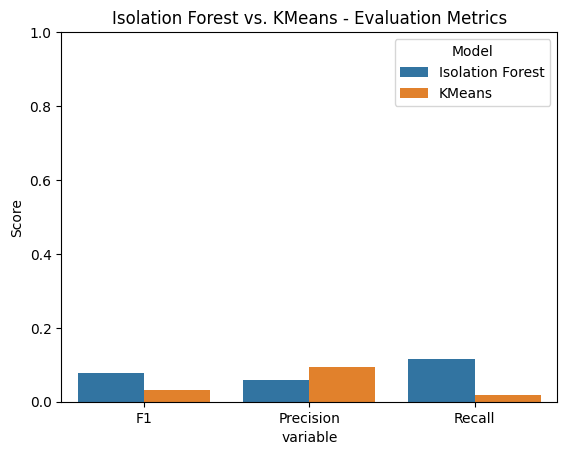

In [26]:
sns.barplot(data=comparison_df.melt(id_vars='Model'), x='variable', y='value', hue='Model')
plt.title('Isolation Forest vs. KMeans - Evaluation Metrics')
plt.ylabel('Score')
plt.ylim(0, 1)
plt.legend(title='Model')
plt.show()


In [27]:
isolation_forest_results = results_df.copy()
isolation_forest_results['Model'] = 'Isolation Forest'
isolation_forest_summary = isolation_forest_results.groupby('Model').max(numeric_only=True).reset_index()

# Combine both
combined_results = pd.concat([isolation_forest_summary, kmeans_results], ignore_index=True)
combined_results = combined_results[['Model', 'F1', 'Precision', 'Recall']]
combined_results.sort_values(by='F1', ascending=False, inplace=True)

print("🔍 Best Unsupervised Model Comparison:")
print(combined_results)


🔍 Best Unsupervised Model Comparison:
              Model        F1  Precision    Recall
0  Isolation Forest  0.077040   0.074675  0.114839
1            KMeans  0.031216   0.094156  0.018710


In [28]:
#Feature Fusion
X_scaled = X_scaled.copy()
X_scaled['anomaly_score'] = anomaly_score


In [32]:
# 🧠 Supervised Learning with Random Forest + SMOTE + Hyperparameter Tuning
from sklearn.model_selection import StratifiedKFold
from imblearn.pipeline import Pipeline
from imblearn.over_sampling import SMOTE
import time

#Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, anomaly_score, test_size=0.2, stratify=anomaly_score, random_state=42
)

#Pipeline with SMOTE + Random Forest
smote = SMOTE(random_state=42)
rf = RandomForestClassifier(random_state=42)

rf_params = {
    'clf__n_estimators': [100, 200],
    'clf__max_depth': [10, None],
    'clf__min_samples_split': [2, 5],
    'clf__class_weight': ['balanced']
}

rf_pipe = Pipeline([
    ('smote', smote),
    ('clf', rf)
])



In [33]:
#Grid Search with Stratified K-Fold
cv = StratifiedKFold(n_splits=3, shuffle=True, random_state=42)

grid_search = GridSearchCV(
    rf_pipe,
    param_grid=rf_params,
    cv=cv,
    scoring='f1',
    n_jobs=-1,
    verbose=1
)

start_time = time.time()
grid_search.fit(X_train, y_train)
print(f"⏱️ Training completed in {round(time.time() - start_time, 2)} seconds")


Fitting 3 folds for each of 8 candidates, totalling 24 fits
⏱️ Training completed in 133.09 seconds



Threshold: 0.3
F1: 1.0
Precision: 1.0
Recall: 1.0

Threshold: 0.4
F1: 1.0
Precision: 1.0
Recall: 1.0

Threshold: 0.5
F1: 1.0
Precision: 1.0
Recall: 1.0


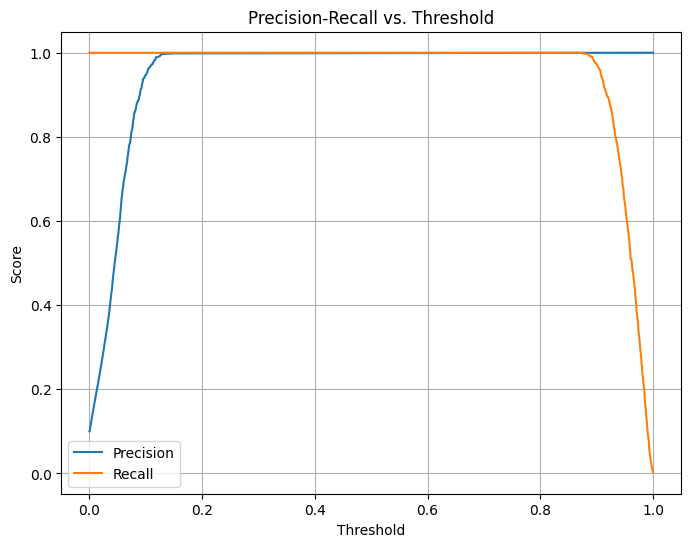

In [34]:
# Best Model
best_rf = grid_search.best_estimator_

# Get predicted class probabilities for the positive class (fraud = 1)
y_probs = best_rf.predict_proba(X_test)[:, 1]

from sklearn.metrics import precision_recall_curve

# Try a few thresholds
for threshold in [0.3, 0.4, 0.5]:
    y_pred_thresh = (y_probs >= threshold).astype(int)
    print(f"\nThreshold: {threshold}")
    print("F1:", f1_score(y_test, y_pred_thresh))
    print("Precision:", precision_score(y_test, y_pred_thresh))
    print("Recall:", recall_score(y_test, y_pred_thresh))

precision, recall, thresholds = precision_recall_curve(y_test, y_probs)

plt.figure(figsize=(8, 6))
plt.plot(thresholds, precision[:-1], label='Precision')
plt.plot(thresholds, recall[:-1], label='Recall')
plt.xlabel("Threshold")
plt.ylabel("Score")
plt.title("Precision-Recall vs. Threshold")
plt.legend()
plt.grid(True)
plt.show()


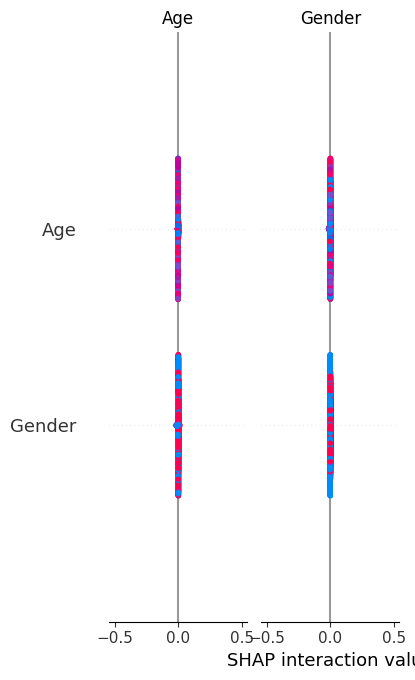

In [35]:
# Use TreeExplainer for tree-based models
explainer = shap.Explainer(best_rf.named_steps['clf'])
shap_values = explainer(X_test)

# Summary plot
shap.summary_plot(shap_values, X_test, plot_type='bar')



In [36]:
def interpret_shap_summary(shap_values, feature_data, top_n=5):
    """
    Interprets SHAP summary bar values and prints the most impactful features.

    Parameters:
    - shap_values: SHAP values from explainer
    - feature_data: The DataFrame or array used for the SHAP summary plot
    - top_n: How many top features to describe
    """

    # Average absolute SHAP values across all samples
    mean_abs_shap = np.abs(shap_values.values[:, :, 1]).mean(axis=0)
    feature_names = feature_data.columns if hasattr(feature_data, 'columns') else [f'Feature {i}' for i in range(len(mean_abs_shap))]

    # Create summary table
    shap_summary = pd.DataFrame({
        'Feature': feature_names,
        'Mean |SHAP value|': mean_abs_shap
    }).sort_values(by='Mean |SHAP value|', ascending=False).head(top_n)

    print("\n🔍 Top Contributing Features:")
    for i, row in shap_summary.iterrows():
        print(f"• {row['Feature']}: average impact score = {row['Mean |SHAP value|']:.4f}")

    print(f"\n🧠 Interpretation: The features above had the largest influence (positive or negative) on the model's predictions. A high SHAP value means a strong push toward predicting fraud or non-fraud.")

    return shap_summary

# Natural language explanation
shap_summary_df = interpret_shap_summary(shap_values, X_test)


🔍 Top Contributing Features:
• anomaly_score: average impact score = 0.3839
• Transaction_Location: average impact score = 0.0307
• Bank_Branch: average impact score = 0.0301
• City: average impact score = 0.0269
• Merchant_Category: average impact score = 0.0211

🧠 Interpretation: The features above had the largest influence (positive or negative) on the model's predictions. A high SHAP value means a strong push toward predicting fraud or non-fraud.


In [1]:
# Evaluation
y_pred = best_rf.predict(X_test)
print("\n🧾 Classification Report:")
print(classification_report(y_test, y_pred))
print("🔍 ROC-AUC Score:", roc_auc_score(y_test, best_rf.predict_proba(X_test)[:, 1]))

# Confusion matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix - Random Forest")
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

NameError: name 'best_rf' is not defined